In [ ]:
pip install mediapipe

In [1]:
import os
import pickle
import time
import psutil
import threading
import mediapipe as mp
import cv2

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = 'Data'

data = []
labels = []

def monitor_cpu(interval=0.1):
    cpu_usage_list = []
    stop_flag = False

    def monitor():
        while not stop_flag:
            cpu_usage_list.append(psutil.cpu_percent(interval=interval))
    
    return cpu_usage_list, lambda: stop_flag, monitor

# Start monitoring CPU usage
cpu_usage_list, stop_monitoring, monitor_thread = monitor_cpu()
monitoring_thread = threading.Thread(target=monitor_thread)
monitoring_thread.start()

start_time_total = time.time()

for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []
        x_ = []
        y_ = []

        start_time_img = time.time()

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

        end_time_img = time.time()
        print(f"Processed {img_path} in {end_time_img - start_time_img:.2f} seconds")

stop_monitoring = True
monitoring_thread.join()

end_time_total = time.time()

print(f"Total processing time: {end_time_total - start_time_total:.2f} seconds")
print(f"Average CPU usage: {sum(cpu_usage_list) / len(cpu_usage_list):.2f}%")

with open('data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)


ModuleNotFoundError: No module named 'mediapipe'

In [ ]:
import os
import pickle

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = 'Data'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []
        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

Processed 0.jpg in 0.15 seconds
Processed 1.jpg in 0.05 seconds
Processed 10.jpg in 0.05 seconds
Processed 11.jpg in 0.05 seconds
Processed 12.jpg in 0.05 seconds
Processed 13.jpg in 0.05 seconds
Processed 14.jpg in 0.05 seconds
Processed 15.jpg in 0.05 seconds
Processed 16.jpg in 0.05 seconds
Processed 17.jpg in 0.05 seconds
Processed 18.jpg in 0.05 seconds
Processed 19.jpg in 0.05 seconds
Processed 2.jpg in 0.05 seconds
Processed 20.jpg in 0.05 seconds
Processed 21.jpg in 0.05 seconds
Processed 22.jpg in 0.05 seconds
Processed 23.jpg in 0.05 seconds
Processed 24.jpg in 0.05 seconds
Processed 25.jpg in 0.05 seconds
Processed 26.jpg in 0.05 seconds
Processed 27.jpg in 0.05 seconds
Processed 28.jpg in 0.05 seconds
Processed 29.jpg in 0.05 seconds
Processed 3.jpg in 0.05 seconds
Processed 30.jpg in 0.05 seconds
Processed 31.jpg in 0.05 seconds
Processed 32.jpg in 0.05 seconds
Processed 33.jpg in 0.05 seconds
Processed 34.jpg in 0.05 seconds
Processed 35.jpg in 0.05 seconds
Processed 36.j

In [15]:
# Main Model
"""import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load data
data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

# Convert labels to categorical (if they are not already)
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Define the model
model = Sequential([
    Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'{accuracy * 100:.2f}% of samples were classified correctly !')

# Save the model
model.save('model.h5')"""

In [7]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    data_dict = pickle.load(open(file_path, 'rb'))
    data = np.asarray(data_dict['data'])
    labels = np.asarray(data_dict['labels'])
    return data, labels

def preprocess_data(data, labels):
    num_classes = len(np.unique(labels))
    labels = to_categorical(labels, num_classes)
    return train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

def build_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, input_shape=(input_shape,), activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, x_train, y_train):
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    return history

def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'{accuracy * 100:.2f}% of samples were classified correctly!')
    return accuracy

def get_metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_test_class = np.argmax(y_test, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    precision = precision_score(y_test_class, y_pred_class, average='weighted')
    recall = recall_score(y_test_class, y_pred_class, average='weighted')
    f1 = f1_score(y_test_class, y_pred_class, average='weighted')
    
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    return precision, recall, f1, y_test_class, y_pred_class

def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curves - Accuracy')
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Learning Curves - Loss')
    
    plt.show()

def plot_confusion_matrix(y_test_class, y_pred_class, labels):
    cm = confusion_matrix(y_test_class, y_pred_class)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def save_model(model, file_path):
    model.save(file_path)

# Main execution
data, labels = load_data('./data.pickle')
x_train, x_test, y_train, y_test = preprocess_data(data, labels)

In [8]:
model = build_model(x_train.shape[1], len(np.unique(labels)))
history = train_model(model, x_train, y_train)
    


Epoch 1/10


C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1659 - loss: 2.9100 - val_accuracy: 0.2697 - val_loss: 2.7939
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2616 - loss: 2.7142 - val_accuracy: 0.4013 - val_loss: 2.4997
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4164 - loss: 2.3585 - val_accuracy: 0.5362 - val_loss: 2.0540
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6139 - loss: 1.8813 - val_accuracy: 0.6711 - val_loss: 1.5855
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7475 - loss: 1.4521 - val_accuracy: 0.7368 - val_loss: 1.1832
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 1.0608 - val_accuracy: 0.9441 - val_loss: 0.8979
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9245 - loss: 0.8094 - val_accuracy: 0.9671 - val_loss: 0.7010
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.6034 - val_accuracy: 0.9934 - val_loss: 0.5339
Epo

In [9]:
evaluate_model(model, x_test, y_test)
precision, recall, f1, y_test_class, y_pred_class = get_metrics(model, x_test, y_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.3198 
100.00% of samples were classified correctly!
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


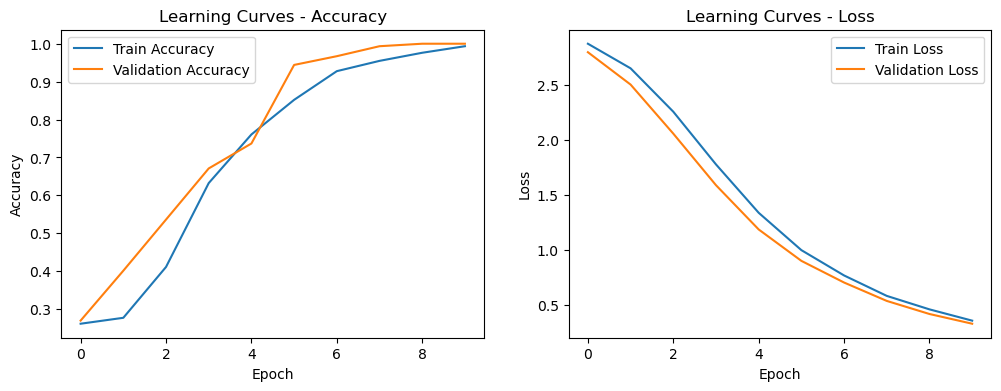

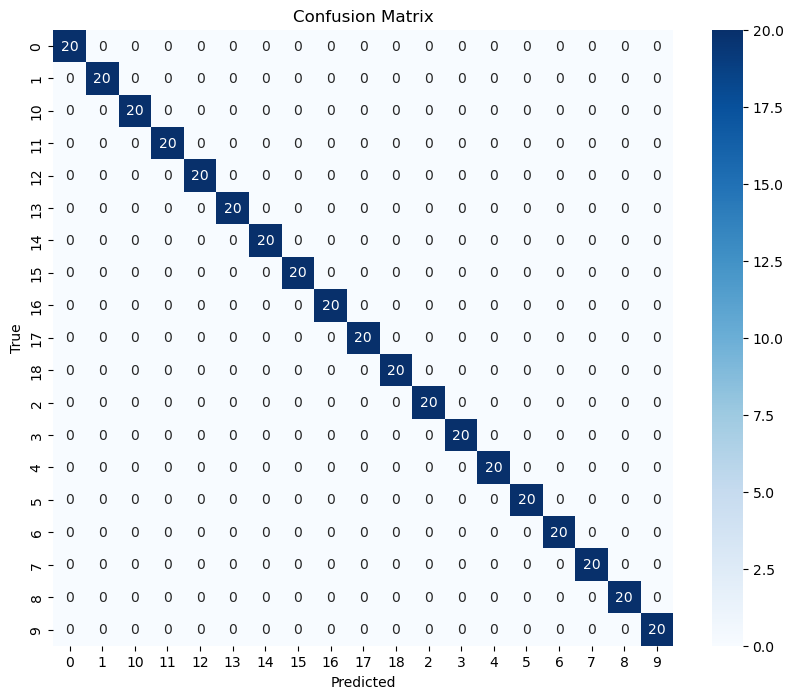

In [10]:


plot_learning_curves(history)
plot_confusion_matrix(y_test_class, y_pred_class, np.unique(labels))    
save_model(model, 'model.h5')

In [13]:
!pip install psutil
import psutil

In [10]:
def monitor_cpu():
    return psutil.cpu_percent(interval=None)

In [11]:
monitor_cpu()

3.3

In [12]:
def monitor_cpu(interval, stop_flag, cpu_usage_list):
    while not stop_flag():
        cpu_usage_list.append(psutil.cpu_percent(interval=interval))
    return

In [16]:

def train_model(model, x_train, y_train):
    cpu_usage_list = []
    stop_flag = False
    monitor_thread = Thread(target=monitor_cpu, args=(0.5, lambda: stop_flag, cpu_usage_list))
    monitor_thread.start()
    
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    end_time = time.time()
    
    stop_flag = True
    monitor_thread.join()
    
    elapsed_time = end_time - start_time
    avg_cpu_usage = np.mean(cpu_usage_list)
    
    print(f'Training CPU Usage: {avg_cpu_usage:.2f}%')
    print(f'Training Time: {elapsed_time:.2f} seconds')
    
    return history

In [17]:
train_model(model, x_train, y_train)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - loss: 0.2377 - val_accuracy: 1.0000 - val_loss: 0.1932
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1789 - val_accuracy: 1.0000 - val_loss: 0.1579
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.1518 - val_accuracy: 1.0000 - val_loss: 0.1276
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1242 - val_accuracy: 1.0000 - val_loss: 0.1061
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0996 - val_accuracy: 1.0000 - val_loss: 0.0905
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0858 - val_accuracy: 1.0000 - val_loss: 0.0753
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0736 - val_accuracy: 1.0000 - val_loss: 0.0635
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0588 - val_accuracy: 1.0000 - val_loss:

In [2]:
import cv2
import mediapipe as mp
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from tensorflow.keras.models import load_model

# Load the model from the .h5 file
model = load_model('model.h5')

# Initialize MediaPipe hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# Label dictionary for predictions
labels_dict_lett = {0: 'ሀ', 1: 'ለ', 2: 'መ', 3: 'ሰ', 4: 'ር', 5: 'ሰ', 6: 'ሽ', 7: 'ቀ', 8: 'በ', 9: 'ተ', 10: 'ነ', 11: 'ኘ', 12: 'አ', 13: 'ወ', 14: 'ዐ', 15: 'ዘ', 16: 'ገ', 17: 'ፈ', 18: 'ፐ'}

# Load the Amharic font
font_path = 'Noto_Sans_Ethiopic/static/NotoSansEthiopic-Regular.ttf'
font_size = 35
font = ImageFont.truetype(font_path, font_size)

# Path to the single image
image_path = 'Data/17/17.jpg'

# Read image
frame = cv2.imread(image_path)
data_aux = []
x_ = []
y_ = []

H, W, _ = frame.shape

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

results = hands.process(frame_rgb)

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            hand_landmarks,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y

            x_.append(x)
            y_.append(y)

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))

    x1 = int(min(x_) * W) - 10
    y1 = int(min(y_) * H) - 10

    x2 = int(max(x_) * W) - 10
    y2 = int(max(y_) * H) - 10

    # Make prediction using the model
if len(data_aux) >= 42:  # Ensure data_aux has at least 42 elements
    prediction = model.predict([np.asarray(data_aux[:42]).reshape(1, -1)])
    predicted_label_index = np.argmax(prediction[0])  # Get the index of the maximum value
    predicted_character = labels_dict_lett[predicted_label_index]
else:
    print("Warning: Insufficient data for prediction (less than 42 elements).")
    predicted_character = "Unknown"  # Provide a default prediction or handle the case accordingly

pil_image = Image.fromarray(frame)
draw = ImageDraw.Draw(pil_image)

# Draw the predicted character using the Amharic font
draw.text((x1, y1 - 10), predicted_character, font=font, fill=(0, 0, 0))
frame = np.array(pil_image)

# Display the image with the predicted character
cv2.imshow('frame', frame)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


In [6]:
###################################Word###################################

In [17]:
import os
import pickle
import mediapipe as mp
import cv2
import numpy as np

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = 'Data_Image'

data = []
labels = []
expected_length = 84  # 21 landmarks * 2 (for x and y coordinates)

# Iterate through each directory and image file in the data directory
for dir_ in os.listdir(DATA_DIR):
    print("Processing Directory: ", dir_)
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []
        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        
        # Check if the image was successfully loaded
        if img is None:
            print(f"Skipping {img_path}: Unable to load image.")
            continue
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Process the image with MediaPipe Hands
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            # Check if data_aux has the expected length
            if len(data_aux) == expected_length:
                data.append(data_aux)
                labels.append(dir_)
            else:
                print(f"Skipping {img_path} due to inconsistent data length.")
        else:
            print(f"No hand landmarks detected in {img_path}.")

# Save the data using pickle
with open('Data_Image.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)

print(f"Data saved to Data_Image.pickle with {len(data)} entries.")

Processing Directory:  0
Skipping 109.jpg due to inconsistent data length.
Skipping 110.jpg due to inconsistent data length.
Skipping 111.jpg due to inconsistent data length.
Skipping 112.jpg due to inconsistent data length.
Skipping 113.jpg due to inconsistent data length.
Skipping 114.jpg due to inconsistent data length.
Skipping 115.jpg due to inconsistent data length.
Skipping 116.jpg due to inconsistent data length.
Skipping 117.jpg due to inconsistent data length.
Skipping 118.jpg due to inconsistent data length.
Skipping 119.jpg due to inconsistent data length.
Skipping 120.jpg due to inconsistent data length.
Skipping 13.jpg due to inconsistent data length.
Skipping 15.jpg due to inconsistent data length.
Skipping 150.jpg due to inconsistent data length.
Skipping 151.jpg due to inconsistent data length.
Skipping 152.jpg due to inconsistent data length.
Skipping 153.jpg due to inconsistent data length.
Skipping 154.jpg due to inconsistent data length.
Skipping 155.jpg due to inc

In [18]:
"""import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the data
with open('Data_Image.pickle', 'rb') as f:
    data_dict = pickle.load(f)

data = data_dict['data']
labels = data_dict['labels']

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Save the label encoder classes to a text file
np.savetxt('label_classes.txt', label_encoder.classes_, fmt='%s')

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(len(data[0]),)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(labels)), activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

"""

C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3793 - loss: 1.4490 - val_accuracy: 0.5759 - val_loss: 1.1903
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6724 - loss: 1.1098 - val_accuracy: 0.7435 - val_loss: 0.8213
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.7761 - val_accuracy: 0.9843 - val_loss: 0.4795
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9338 - loss: 0.4664 - val_accuracy: 0.9895 - val_loss: 0.2688
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.2812 - val_accuracy: 0.9895 - val_loss: 0.1615
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9892 - loss: 0.1854 - val_accuracy: 0.9895 - val_loss: 0.1091
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.1399 - val_accuracy: 0.9895 - val_loss: 0.0801
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.1222 - val_accuracy: 0.9895 - val_loss

In [19]:
# Save the model
model.save('sign_language_model.h5')

# Load the label encoder classes from the text file (for later use)
label_classes = np.loadtxt('label_classes.txt', dtype=str)

# Verify the loaded classes
print("Label classes loaded from file:", label_classes)

Label classes loaded from file: ['0' '1' '2' '3' '4']


In [14]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from threading import Thread

def load_data(file_path):
    data_dict = pickle.load(open(file_path, 'rb'))
    data = np.asarray(data_dict['data'])
    labels = np.asarray(data_dict['labels'])
    return data, labels

def preprocess_data(data, labels):
    num_classes = len(np.unique(labels))
    labels = to_categorical(labels, num_classes)
    return train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

def build_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, input_shape=(input_shape,), activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, x_train, y_train):
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    return history

def evaluate_model(model, x_test, y_test):
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'{accuracy * 100:.2f}% of samples were classified correctly!')
    return accuracy

def get_metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_test_class = np.argmax(y_test, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    precision = precision_score(y_test_class, y_pred_class, average='weighted')
    recall = recall_score(y_test_class, y_pred_class, average='weighted')
    f1 = f1_score(y_test_class, y_pred_class, average='weighted')
    
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    return precision, recall, f1, y_test_class, y_pred_class

def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curves - Accuracy')
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Learning Curves - Loss')
    
    plt.show()

def plot_confusion_matrix(y_test_class, y_pred_class, labels):
    cm = confusion_matrix(y_test_class, y_pred_class)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def save_model(model, file_path):
    model.save(file_path)

# Main execution
data, labels = load_data('Data_Image.pickle')
x_train, x_test, y_train, y_test = preprocess_data(data, labels)
    



In [15]:
model = build_model(x_train.shape[1], len(np.unique(labels)))
history = train_model(model, x_train, y_train)
    


Epoch 1/10


C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3175 - loss: 1.5835 - val_accuracy: 0.8954 - val_loss: 1.3984
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8694 - loss: 1.3211 - val_accuracy: 0.7647 - val_loss: 1.0831
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8465 - loss: 0.9678 - val_accuracy: 0.9673 - val_loss: 0.7259
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9551 - loss: 0.6279 - val_accuracy: 0.9869 - val_loss: 0.4361
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.3649 - val_accuracy: 0.9935 - val_loss: 0.2486
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.2138 - val_accuracy: 0.9935 - val_loss: 0.1459
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.1430 - val_accuracy: 0.9935 - val_loss: 0.0957
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0931 - val_accuracy: 0.9935 - val_loss: 0.0682
Ep

In [16]:
evaluate_model(model, x_test, y_test)
precision, recall, f1, y_test_class, y_pred_class = get_metrics(model, x_test, y_test)
    


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0488 
98.95% of samples were classified correctly!
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Precision: 0.98
Recall: 0.99
F1 Score: 0.98


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


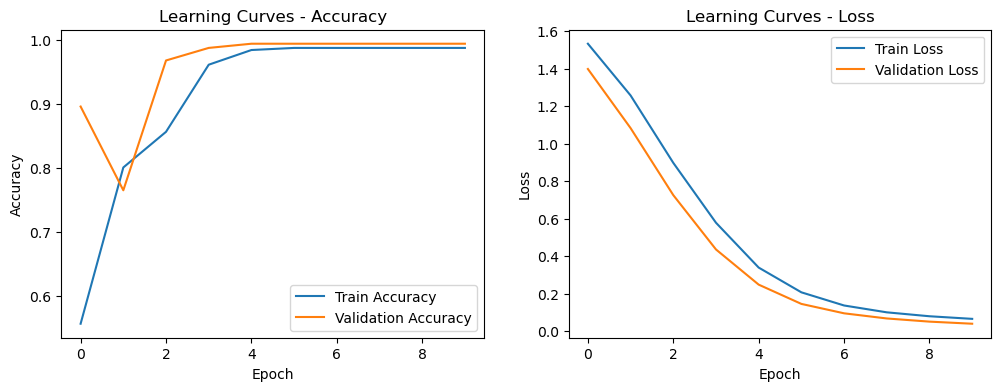

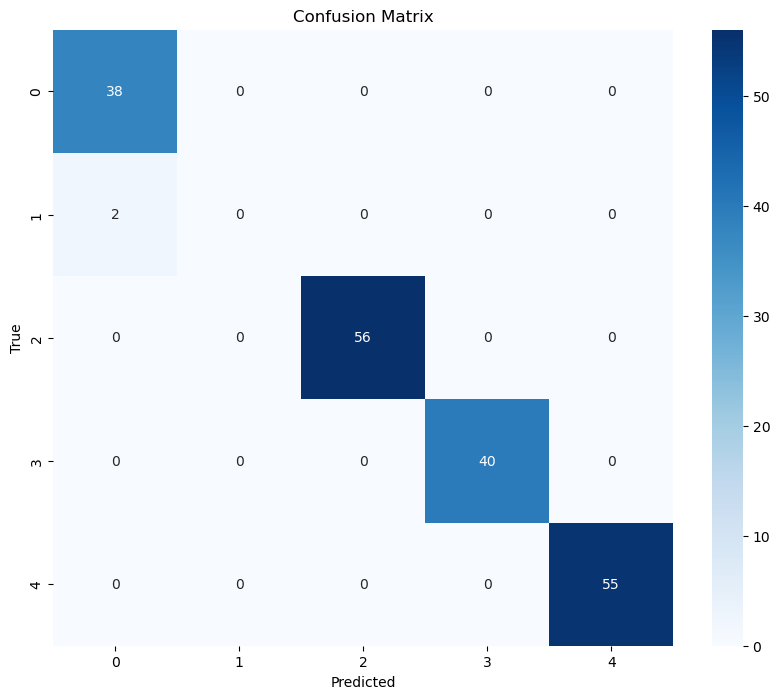

In [17]:
plot_learning_curves(history)
plot_confusion_matrix(y_test_class, y_pred_class, np.unique(labels))


In [18]:
save_model(model, 'sign_language_model.h5')

In [21]:
import psutil
import time
def monitor_cpu(interval, stop_flag, cpu_usage_list):
    while not stop_flag():
        cpu_usage_list.append(psutil.cpu_percent(interval=interval))
    return
def train_model(model, x_train, y_train):
    cpu_usage_list = []
    stop_flag = False
    monitor_thread = Thread(target=monitor_cpu, args=(0.5, lambda: stop_flag, cpu_usage_list))
    monitor_thread.start()
    
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    end_time = time.time()
    
    stop_flag = True
    monitor_thread.join()
    
    elapsed_time = end_time - start_time
    avg_cpu_usage = np.mean(cpu_usage_list)
    
    print(f'Training CPU Usage: {avg_cpu_usage:.2f}%')
    print(f'Training Time: {elapsed_time:.2f} seconds')
    
    return history

In [22]:
train_model(model, x_train, y_train)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0585 - val_accuracy: 0.9935 - val_loss: 0.0324
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 0.0284
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0402 - val_accuracy: 1.0000 - val_loss: 0.0217
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0339 - val_accuracy: 1.0000 - val_loss: 0.0198
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9913 - loss: 0.0322 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0303 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9968 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss:

In [26]:
import os
import pickle
import mediapipe as mp
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from tensorflow.keras.models import load_model

# Load the model
try:
    model = load_model('sign_language_model.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# Initialize MediaPipe modules
mp_hands = mp.solutions.hands
mp_face_detection = mp.solutions.face_detection
labels_dict = {0: 'qend', 1: 'Gulbetegna', 2: 'Selam', 3: 'Bank', 4: 'Mahber'}
# Load the Amharic font
font_path = 'Noto_Sans_Ethiopic/static/NotoSansEthiopic-Regular.ttf'
font_size = 35
try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    print(f"Error loading font from {font_path}")
    exit(1)

# Load an image instead of using the webcam
image_path = 'Data_Image/4/100.jpg'
frame = cv2.imread(image_path)
if frame is None:
    print(f"Error: Unable to load image from {image_path}")
    exit(1)

# Initialize variables
predicted_characters = []  # List to store the predicted characters
max_chars_per_line = 5  # Maximum number of characters per line
max_lines = 2  # Maximum number of lines

data_aux = []
x_ = []
y_ = []

H, W, _ = frame.shape

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Hand detection
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
results = hands.process(frame_rgb)
new_predicted_character = None  # Initialize the variable here

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            hand_landmarks,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y

            x_.append(x)
            y_.append(y)

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))

    x1 = int(min(x_) * W) - 10
    y1 = int(min(y_) * H) - 10

    x2 = int(max(x_) * W) - 10
    y2 = int(max(y_) * H) - 10

    # Handle varying lengths of data_aux
    if len(data_aux) != 84:
        print(f"Warning: Incorrect number of features extracted: {len(data_aux)}. Expected 84.")
    else:
        try:
            prediction = model.predict([np.asarray(data_aux).reshape(1, -1)])
            predicted_label = np.argmax(prediction[0])
            new_predicted_character = labels_dict.get(predicted_label, "Unknown")

            print(f"Predicted Character: {new_predicted_character}")  # Debugging

            if not predicted_characters or new_predicted_character != predicted_characters[-1]:
                if len(predicted_characters) >= max_chars_per_line * max_lines:
                    predicted_characters = []
                predicted_characters.append(new_predicted_character)
        except Exception as e:
            print(f"Prediction error: {e}")

# Pose detection
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5)
try:
    pose_results = pose.process(frame_rgb)
    if pose_results.pose_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            pose_results.pose_landmarks,  # model output
            mp_pose.POSE_CONNECTIONS,  # pose connections
            mp_drawing_styles.get_default_pose_landmarks_style())
except Exception as e:
    print(f"Pose detection error: {e}")

# Face detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)
face_results = face_detection.process(frame_rgb)
if face_results.detections:
    for detection in face_results.detections:
        mp_drawing.draw_detection(frame, detection)

# Display the predicted characters
# Create a blank image using PIL
pil_image = Image.fromarray(frame)
draw = ImageDraw.Draw(pil_image)

# Draw the predicted characters using the Amharic font
y_pos = 300  # Initial y position
x_pos = 10
line_height = 50  # Distance between lines

for i, character in enumerate(predicted_characters):
    # Start a new line if the current line is full
    if i > 0 and i % max_chars_per_line == 0:
        y_pos += line_height
        x_pos = 10
        # If the maximum number of lines is reached, reset to the top
        if y_pos >= 300 + max_lines * line_height:
            predicted
            predicted_characters = []
            break
    draw.text((x_pos, y_pos), character, font=font, fill=(0, 0, 0))
    x_pos += 100  # Increment x position for the next character

# Convert the modified PIL image back to a NumPy array
frame = np.array(pil_image)

# Display the image with predicted characters
cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Character: Mahber


In [ ]:
import pickle
import cv2
import mediapipe as mp
import numpy as np
from PIL import ImageFont, ImageDraw, Image

# Load the model from the pickle file
model_dict = pickle.load(open('model.p', 'rb'))
model = model_dict['model']

# Initialize MediaPipe hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# Label dictionary for predictions
labels_dict_lett = {0: 'ሀ', 1: 'ለ', 2: 'መ', 3: 'ሰ', 4: 'ር', 5: 'ሰ', 6: 'ሽ', 7: 'ቀ', 8: 'በ', 9: 'ተ', 10: 'ነ', 11: 'ኘ', 12: 'አ', 13: 'ወ', 14: 'ዐ', 15: 'ዘ', 16: 'ገ', 17: 'ፈ', 18: 'ፐ'}

# Load the Amharic font
font_path = 'Noto_Sans_Ethiopic/static/NotoSansEthiopic-Regular.ttf'
font_size = 35
font = ImageFont.truetype(font_path, font_size)

# Path to the single image
image_path = 'Data/12/14.jpg'

# Read image
frame = cv2.imread(image_path)
data_aux = []
x_ = []
y_ = []

H, W, _ = frame.shape

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

results = hands.process(frame_rgb)

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            hand_landmarks,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y

            x_.append(x)
            y_.append(y)

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))

    x1 = int(min(x_) * W) - 10
    y1 = int(min(y_) * H) - 10

    x2 = int(max(x_) * W) - 10
    y2 = int(max(y_) * H) - 10

    # Make prediction using the model
    prediction = model.predict([np.asarray(data_aux[:42])])
    predicted_character = labels_dict[int(prediction[0])]

    # Create a blank image using PIL
    pil_image = Image.fromarray(frame)
    draw = ImageDraw.Draw(pil_image)

    # Draw the predicted character using the Amharic font
    draw.text((x1, y1 - 10), predicted_character, font=font, fill=(0, 0, 0))
    frame = np.array(pil_image)

    # Display the image with the predicted character
    cv2.imshow('frame', frame)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()

else:
    print("No hand landmarks detected.")

In [ ]:
import os
import pickle
import mediapipe as mp
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from tensorflow.keras.models import load_model

# Load the model
try:
    model = load_model('sign_language_model.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# Initialize MediaPipe modules
mp_hands = mp.solutions.hands
mp_face_detection = mp.solutions.face_detection
labels_dict = {0: 'qend', 1: 'Gulbetegna', 2: 'Selam', 3: 'Bank', 4: 'Mahber'}
# Load the Amharic font
font_path = 'Noto_Sans_Ethiopic/static/NotoSansEthiopic-Regular.ttf'
font_size = 35
try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    print(f"Error loading font from {font_path}")
    exit(1)

# Load an image instead of using the webcam
image_path = 'Data_Image/4/100.jpg'
frame = cv2.imread(image_path)
if frame is None:
    print(f"Error: Unable to load image from {image_path}")
    exit(1)

# Initialize variables
predicted_characters = []  # List to store the predicted characters
max_chars_per_line = 5  # Maximum number of characters per line
max_lines = 2  # Maximum number of lines

data_aux = []
x_ = []
y_ = []

H, W, _ = frame.shape

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Hand detection
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
results = hands.process(frame_rgb)
new_predicted_character = None  # Initialize the variable here

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            hand_landmarks,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y

            x_.append(x)
            y_.append(y)

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))

    x1 = int(min(x_) * W) - 10
    y1 = int(min(y_) * H) - 10

    x2 = int(max(x_) * W) - 10
    y2 = int(max(y_) * H) - 10

    # Handle varying lengths of data_aux
    if len(data_aux) != 84:
        print(f"Warning: Incorrect number of features extracted: {len(data_aux)}. Expected 84.")
    else:
        try:
            prediction = model.predict([np.asarray(data_aux).reshape(1, -1)])
            predicted_label = np.argmax(prediction[0])
            new_predicted_character = labels_dict.get(predicted_label, "Unknown")

            print(f"Predicted Character: {new_predicted_character}")  # Debugging

            if not predicted_characters or new_predicted_character != predicted_characters[-1]:
                if len(predicted_characters) >= max_chars_per_line * max_lines:
                    predicted_characters = []
                predicted_characters.append(new_predicted_character)
        except Exception as e:
            print(f"Prediction error: {e}")

# Pose detection
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5)
try:
    pose_results = pose.process(frame_rgb)
    if pose_results.pose_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            pose_results.pose_landmarks,  # model output
            mp_pose.POSE_CONNECTIONS,  # pose connections
            mp_drawing_styles.get_default_pose_landmarks_style())
except Exception as e:
    print(f"Pose detection error: {e}")

# Face detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)
face_results = face_detection.process(frame_rgb)
if face_results.detections:
    for detection in face_results.detections:
        mp_drawing.draw_detection(frame, detection)

# Display the predicted characters
# Create a blank image using PIL
pil_image = Image.fromarray(frame)
draw = ImageDraw.Draw(pil_image)

# Draw the predicted characters using the Amharic font
y_pos = 300  # Initial y position
x_pos = 10
line_height = 50  # Distance between lines

for i, character in enumerate(predicted_characters):
    # Start a new line if the current line is full
    if i > 0 and i % max_chars_per_line == 0:
        y_pos += line_height
        x_pos = 10
        # If the maximum number of lines is reached, reset to the top
        if y_pos >= 300 + max_lines * line_height:
            predicted
            predicted_characters = []
            break
    draw.text((x_pos, y_pos), character, font=font, fill=(0, 0, 0))
    x_pos += 100  # Increment x position for the next character

# Convert the modified PIL image back to a NumPy array
frame = np.array(pil_image)

# Display the image with predicted characters
cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
labels_dict_lett = {0: 'ሀ', 1: 'ለ', 2: 'መ', 3: 'ሰ', 4: 'ር', 5: 'ሰ', 6: 'ሽ', 7: 'ቀ', 8: 'በ', 9: 'ተ', 10: 'ነ', 11: 'ኘ', 12: 'አ', 13: 'ወ', 14: 'ዐ', 15: 'ዘ', 16: 'ገ', 17: 'ፈ', 18: 'ፐ'}
labels_dict = {0: 'qend', 1: 'Gulbetegna', 2: 'Selam', 3: 'Bank', 4: 'Mahber'}

In [3]:
import os
import pickle
import mediapipe as mp
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from tensorflow.keras.models import load_model

# Load the model
try:
    model = load_model('sign_language_model.h5')
    model_letter = load_model('model.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Initialize MediaPipe modules
mp_hands = mp.solutions.hands
mp_face_detection = mp.solutions.face_detection

# Label dictionaries for predictions
labels_dict_lett = {0: 'ሀ', 1: 'ለ', 2: 'መ', 3: 'ሰ', 4: 'ር', 5: 'ሰ', 6: 'ሽ', 7: 'ቀ', 8: 'በ', 9: 'ተ', 10: 'ነ', 11: 'ኘ', 12: 'አ', 13: 'ወ', 14: 'ዐ', 15: 'ዘ', 16: 'ገ', 17: 'ፈ', 18: 'ፐ'}
labels_dict = {0: 'qend', 1: 'Gulbetegna', 2: 'Selam', 3: 'Bank', 4: 'Mahber'}

# Load the Amharic font
font_path = 'Noto_Sans_Ethiopic/static/NotoSansEthiopic-Regular.ttf'
font_size = 35
try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    print(f"Error loading font from {font_path}")
    exit(1)

# Path to the single image
image_path = 'Data_Image/2/106.jpg'

# Read image
frame = cv2.imread(image_path)
if frame is None:
    print(f"Error: Unable to load image from {image_path}")
    exit(1)

# Initialize variables
predicted_characters = []  # List to store the predicted characters
max_chars_per_line = 5  # Maximum number of characters per line
max_lines = 2  # Maximum number of lines

data_aux = []
x_ = []
y_ = []

H, W, _ = frame.shape

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Hand detection
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)
results = hands.process(frame_rgb)
new_predicted_character = None  # Initialize the variable here

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            hand_landmarks,  # model output
            mp_hands.HAND_CONNECTIONS,  # hand connections
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y

            x_.append(x)
            y_.append(y)

        for i in range(len(hand_landmarks.landmark)):
            x = hand_landmarks.landmark[i].x
            y = hand_landmarks.landmark[i].y
            data_aux.append(x - min(x_))
            data_aux.append(y - min(y_))

    x1 = int(min(x_) * W) - 10
    y1 = int(min(y_) * H) - 10

    x2 = int(max(x_) * W) - 10
    y2 = int(max(y_) * H) - 10

    # Handle varying lengths of data_aux
    if len(data_aux) != 84:
        try:
            prediction = model_letter.predict([np.asarray(data_aux).reshape(1, -1)])
            predicted_label = np.argmax(prediction[0])
            new_predicted_character = labels_dict_lett.get(predicted_label, "Unknown")
            # Append the new_predicted_character to the list
            predicted_characters.append(new_predicted_character)
        except Exception as e:
            print(f"Prediction error: {e}")
    else:
        try:
            prediction = model.predict([np.asarray(data_aux).reshape(1, -1)])
            predicted_label = np.argmax(prediction[0])
            new_predicted_character = labels_dict.get(predicted_label, "Unknown")
            # Append the new_predicted_character to the list
            predicted_characters.append(new_predicted_character)
        except Exception as e:
            print(f"Prediction error: {e}")


# Pose detection
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5)
try:
    pose_results = pose.process(frame_rgb)
    if pose_results.pose_landmarks:
        mp_drawing.draw_landmarks(
            frame,  # image to draw
            pose_results.pose_landmarks,  # model output
            mp_pose.POSE_CONNECTIONS,  # pose connections
            mp_drawing_styles.get_default_pose_landmarks_style())
except Exception as e:
    print(f"Pose detection error: {e}")

# Face detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)
face_results = face_detection.process(frame_rgb)
if face_results.detections:
    for detection in face_results.detections:
        mp_drawing.draw_detection(frame, detection)

# Display the predicted characters
# Create a blank image using PIL
pil_image = Image.fromarray(frame)
draw = ImageDraw.Draw(pil_image)

# Draw the predicted characters using the Amharic font
y_pos = 300  # Initial y position
x_pos = 10
line_height = 50  # Distance between lines

for i, character in enumerate(predicted_characters):
    # Start a new line if the current line is full
    if i > 0 and i % max_chars_per_line == 0:
        y_pos += line_height
        x_pos = 10
        # If the maximum number of lines is reached, reset to the top
        if y_pos >= 300 + max_lines * line_height:
            predicted_characters = []
            break
    draw.text((x_pos, y_pos), character, font=font, fill=(0, 0, 0))
    x_pos += 100  # Increment x position for the next character

# Convert the modified PIL image back to a NumPy array
frame = np.array(pil_image)

# Display the image with predicted characters
cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from tensorflow.keras.models import load_model
import mediapipe as mp

# Load the models
try:
    model = load_model('sign_language_model.h5')
    model_letter = load_model('model.h5')
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)

# Initialize MediaPipe modules
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Label dictionaries for predictions
labels_dict_lett = {0: 'ሀ', 1: 'ለ', 2: 'መ', 3: 'ሰ', 4: 'ር', 5: 'ሰ', 6: 'ሽ', 7: 'ቀ', 8: 'በ', 9: 'ተ', 10: 'ነ', 11: 'ኘ', 12: 'አ', 13: 'ወ', 14: 'ዐ', 15: 'ዘ', 16: 'ገ', 17: 'ፈ', 18: 'ፐ'}
labels_dict = {0: 'ቀንድ', 1: 'Gulbetegna', 2: 'Selam', 3: 'Bank', 4: 'Mahber'}

# Load the Amharic font
font_path = 'Noto_Sans_Ethiopic/static/NotoSansEthiopic-Regular.ttf'
font_size = 35
try:
    font = ImageFont.truetype(font_path, font_size)
except IOError:
    print(f"Error loading font from {font_path}")
    exit(1)

# Initialize the webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Unable to capture frame")
        break

    # Convert the frame from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Hand detection
    hands = mp_hands.Hands(static_image_mode=False, min_detection_confidence=0.3)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        # Initialize variables
        data_aux = []
        x_ = []
        y_ = []

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        # Perform prediction based on the length of data_aux
        try:
            if len(data_aux) != 84:
                prediction = model_letter.predict([np.asarray(data_aux).reshape(1, -1)])
                predicted_label = np.argmax(prediction[0])
                new_predicted_character = labels_dict_lett.get(predicted_label, "Unknown")
            else:
                prediction = model.predict([np.asarray(data_aux).reshape(1, -1)])
                predicted_label = np.argmax(prediction[0])
                new_predicted_character = labels_dict.get(predicted_label, "Unknown")

            # Convert frame to PIL image for text rendering
            pil_img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            draw = ImageDraw.Draw(pil_img)
            draw.text((50, 50), new_predicted_character, font=font, fill=(0, 255, 0))

            # Convert back to OpenCV image
            frame = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
        except Exception as e:
            print(f"Prediction error: {e}")

    # Display the frame
    cv2.imshow('frame', frame)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
cap.release()
cv2.destroyAllWindows()